#### Documentación de grafos dirigidos usando networkx

Véase [documentación](https://networkx.org/documentation/stable/reference/classes/digraph.html)


In [60]:
import pandas as pd
pd.options.display.max_columns = 20
import numpy as np
import networkx as nx
import scipy.io
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3, 2))
a = ["A", "B", "C"]
b = ["D", "A", "E"]
df = pd.DataFrame(ints, columns=["weight", "cost"])
df

,weight,cost
0,4,7
1,7,1
2,10,9


In [5]:
df[0] = a
df["b"] = b
df[["weight", "cost", 0, "b"]]
df

,weight,cost,0,b
0,4,7,A,D
1,7,1,B,A
2,10,9,C,E


In [6]:
G = nx.from_pandas_edgelist(df, 0, "b", ["weight", "cost"])
G

In [7]:
G["E"]["C"]["weight"]

10

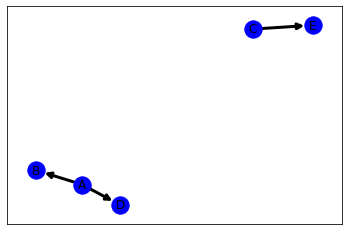

In [8]:
options = {
    'node_color': 'blue',
    'node_size': 300,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
nx.draw_networkx(G, arrows=True, **options)

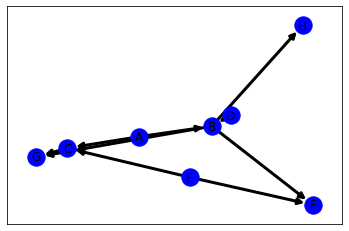

In [9]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

options = {
    'node_color': 'blue',
    'node_size': 300,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 12,
}
nx.draw_networkx(G, arrows=True, **options)

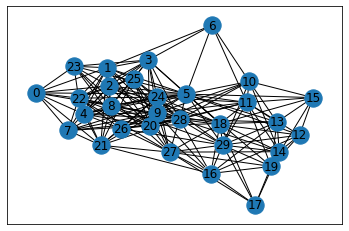

In [10]:
def open_mat_file(path: str):
    mat_json = scipy.io.loadmat(mat_path)
    keys = list(mat_json.keys())
    
    lista = []
    for idx in range(3, len(mat_json.keys())):
        lista.append(mat_json[keys[idx]])
    return mat_json, lista

mat_path = r"../../BCT/BCT/2019_03_03_BCT/data_and_demos/fve30.mat"
json, (names, cij) = open_mat_file(mat_path)

G = nx.from_numpy_array(cij)

nx.draw_networkx(G, arrows=True)